In [1]:
import json
import matplotlib.pyplot as plt
import statistics as stat
import numpy as np
import math

In [16]:
path = '../../output/weights/p_date=2022-11-01-15_11_08/log.json'
#path = "C:/Users/elias/OneDrive/Desktop/log.json"

with open(path, 'r') as f:
    data = json.load(f)

l = len(data["loss"])
print(f"{l} records")
print(data.keys())

40001 records
dict_keys(['loss', 'mean_q', 'episode_reward', 'nb_episode_steps', 'nb_steps', 'episode', 'duration'])


In [17]:
slice = 100000

# Loss
loss = [ v for v in data["loss"] if str(v) != "nan" ][-slice:]
mean_loss = stat.mean(loss) + 100000
loss_filtered = { k: v for k, v in enumerate(loss) if v <= mean_loss }

# Mean Q
mean_q = [ v for v in data["mean_q"] if str(v) != "nan" ]#[-slice:]
mean_mean_q = stat.mean(mean_q)
mean_q_filtered = { k: v for k, v in enumerate(mean_q) }# if v <= mean_mean_q }

# Reward
reward = [ v for v in data["episode_reward"] if str(v) != "nan" ][-slice:]
mean_reward = stat.mean(reward)
episode_reward = { k: v for k, v in enumerate(reward) }# if v <= mean_reward }

# Duration
duration = { k: v for k, v in enumerate(data["duration"]) if str(v) != "nan" }

# NB Episode steps
nb_episode_steps = { k: v for k, v in enumerate(data["nb_episode_steps"][-slice:]) if str(v) != "nan" }

In [18]:
def plot(data, title, labelX, labelY):
    interval = 1000
    interval_min_max = 2_000
    
    
    index_0 = list(data.keys())[0]
    moving_average = { i + index_0 : round(stat.mean(list(data.values())[i:i+interval+1]), 1) for i in range(0, len(data.values()), interval) }
    min_line = { i + index_0 : round(min(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    max_line = { i + index_0 : round(max(list(data.values())[i:i+interval_min_max+1]), 1) for i in range(0, len(data.values()), interval_min_max) }
    
    plt.figure(figsize=(15,5))
    plt.scatter(data.keys(), data.values())
    
    plt.plot(list(moving_average.keys()), list(moving_average.values()), color="red")
    plt.plot(list(min_line.keys()), list(min_line.values()), color="orange")
    plt.plot(list(max_line.keys()), list(max_line.values()), color="orange")
    plt.hlines(y=0, xmin=0, xmax=max(data.keys()), linewidth=2, color='purple')
    
    plt.title(title)
    
    plt.xlabel(labelX)
    plt.ylabel(labelY)
    
    plt.show()
    
    previous = 0
    initial = list(moving_average.values())[0]
    percent_list = []
    for current in moving_average.values():
        if previous > 0:
            
            percentage_prev = ((float(current)-previous)/previous)*100
            percentage_init = ((float(current)-initial)/initial)*100

            item = "{}{}% ({} | {}%)".format(("+" if percentage_prev > 0 else ""), str(math.trunc((percentage_prev))), str(float(current)), math.trunc(percentage_init))

            percent_list.append(item)
        

        previous = current

    print(f"Maximum: {max(data.values())}")
    print(f"Average: {sum(data.values()) / len(data.values())}")
    print(f"Moving Average (simple): {moving_average}")
    print()
    print(f"Moving Average: {percent_list}")
   
    print(f"Minimum: {min(data.values())}")

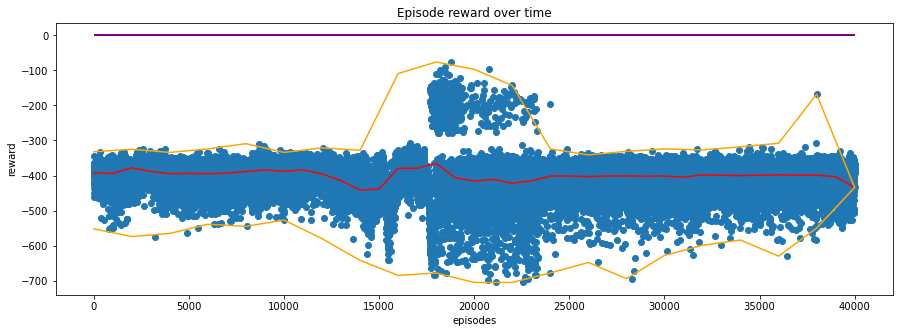

Maximum: -76.0
Average: -399.1720456988575
Moving Average (simple): {0: -391.8, 1000: -393.8, 2000: -378.1, 3000: -388.0, 4000: -394.7, 5000: -393.8, 6000: -394.9, 7000: -393.1, 8000: -388.4, 9000: -383.8, 10000: -387.9, 11000: -383.5, 12000: -395.3, 13000: -414.4, 14000: -441.7, 15000: -438.5, 16000: -379.3, 17000: -379.0, 18000: -365.3, 19000: -406.3, 20000: -415.7, 21000: -410.9, 22000: -422.1, 23000: -415.2, 24000: -401.4, 25000: -401.4, 26000: -402.8, 27000: -401.4, 28000: -401.0, 29000: -402.0, 30000: -401.3, 31000: -404.7, 32000: -398.1, 33000: -399.2, 34000: -400.2, 35000: -398.9, 36000: -398.3, 37000: -398.9, 38000: -398.9, 39000: -403.3, 40000: -434.0}

Moving Average: []
Minimum: -705.0


In [19]:
plot(episode_reward, "Episode reward over time", "episodes", "reward")

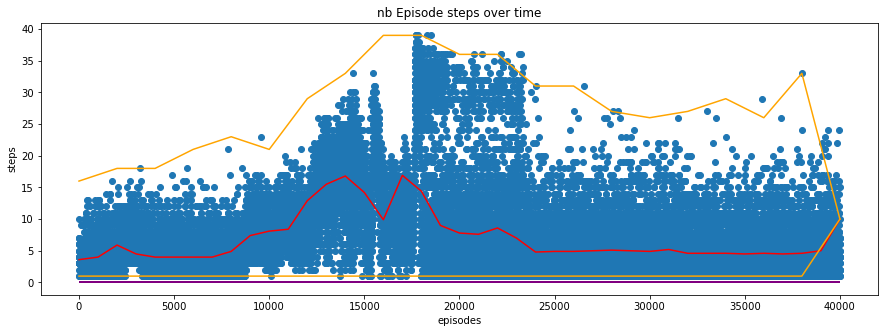

Maximum: 39
Average: 7.009024774380641
Moving Average (simple): {0: 3.6, 1000: 4.0, 2000: 5.9, 3000: 4.5, 4000: 4.0, 5000: 4.0, 6000: 4.0, 7000: 4.0, 8000: 4.9, 9000: 7.4, 10000: 8.1, 11000: 8.4, 12000: 12.9, 13000: 15.5, 14000: 16.8, 15000: 14.2, 16000: 9.9, 17000: 16.9, 18000: 14.4, 19000: 9.0, 20000: 7.8, 21000: 7.6, 22000: 8.6, 23000: 7.0, 24000: 4.8, 25000: 4.9, 26000: 4.9, 27000: 5.0, 28000: 5.1, 29000: 5.0, 30000: 4.9, 31000: 5.2, 32000: 4.6, 33000: 4.6, 34000: 4.6, 35000: 4.5, 36000: 4.6, 37000: 4.5, 38000: 4.6, 39000: 5.0, 40000: 10}

Moving Average: ['+11% (4.0 | 11%)', '+47% (5.9 | 63%)', '-23% (4.5 | 24%)', '-11% (4.0 | 11%)', '0% (4.0 | 11%)', '0% (4.0 | 11%)', '0% (4.0 | 11%)', '+22% (4.9 | 36%)', '+51% (7.4 | 105%)', '+9% (8.1 | 125%)', '+3% (8.4 | 133%)', '+53% (12.9 | 258%)', '+20% (15.5 | 330%)', '+8% (16.8 | 366%)', '-15% (14.2 | 294%)', '-30% (9.9 | 175%)', '+70% (16.9 | 369%)', '-14% (14.4 | 300%)', '-37% (9.0 | 150%)', '-13% (7.8 | 116%)', '-2% (7.6 | 111%)', '+13

In [20]:
plot(nb_episode_steps, "nb Episode steps over time", "episodes", "steps")

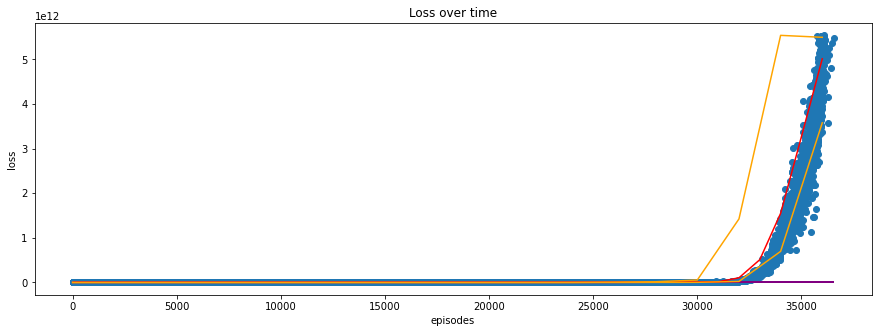

Maximum: 5537033879552.0
Average: 154997609963.06677
Moving Average (simple): {0: 2052.4, 1000: 133.7, 2000: 219.0, 3000: 124.3, 4000: 79.9, 5000: 92.7, 6000: 94.8, 7000: 120.0, 8000: 158.0, 9000: 219.4, 10000: 429.8, 11000: 172.2, 12000: 268.8, 13000: 369.4, 14000: 452.6, 15000: 997.4, 16000: 103.0, 17000: 3316.3, 18000: 53682.0, 19000: 505296.8, 20000: 1184832.1, 21000: 1416459.6, 22000: 1183787.8, 23000: 16630114.6, 24000: 219788318.2, 25000: 293984350.2, 26000: 797309395.6, 27000: 2278552264.4, 28000: 4570207773.0, 29000: 7273404453.6, 30000: 10476359867.2, 31000: 15213867875.0, 32000: 104216409281.3, 33000: 510102003351.9, 34000: 1548026126393.3, 35000: 3267613756159.2, 36000: 5012417230759.0}

Moving Average: ['-93% (133.7 | -93%)', '+63% (219.0 | -89%)', '-43% (124.3 | -93%)', '-35% (79.9 | -96%)', '+16% (92.7 | -95%)', '+2% (94.8 | -95%)', '+26% (120.0 | -94%)', '+31% (158.0 | -92%)', '+38% (219.4 | -89%)', '+95% (429.8 | -79%)', '-59% (172.2 | -91%)', '+56% (268.8 | -86%)', '+

In [21]:
plot(loss_filtered, "Loss over time", "episodes", "loss")

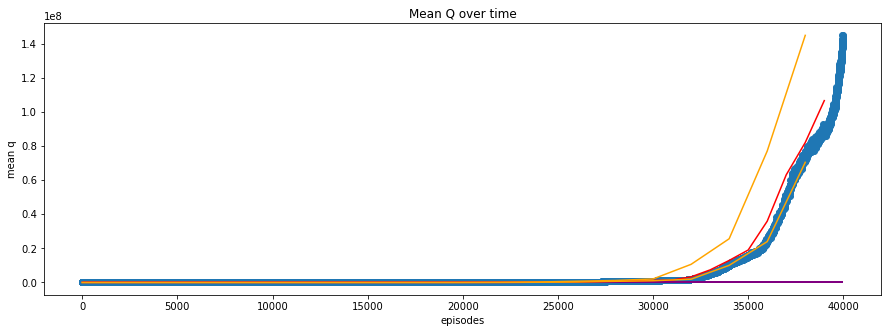

Maximum: 144871824.0
Average: 8381090.807539801
Moving Average (simple): {0: -272.5, 1000: -298.9, 2000: -269.1, 3000: -293.0, 4000: -309.6, 5000: -306.6, 6000: -304.3, 7000: -298.0, 8000: -284.1, 9000: -266.2, 10000: -258.6, 11000: -265.7, 12000: -237.8, 13000: -205.6, 14000: -192.9, 15000: -147.4, 16000: -248.8, 17000: 35.1, 18000: 2928.2, 19000: 9183.4, 20000: 14596.5, 21000: 15951.3, 22000: 14301.5, 23000: 37900.7, 24000: 177966.6, 25000: 211503.8, 26000: 341317.8, 27000: 570762.9, 28000: 806245.1, 29000: 996906.7, 30000: 1196411.6, 31000: 1392225.4, 32000: 3280286.9, 33000: 7361042.0, 34000: 12899917.8, 35000: 19004102.6, 36000: 35893779.3, 37000: 63095692.3, 38000: 82055571.1, 39000: 106603696.8}

Moving Average: ['+8242% (2928.2 | -1174%)', '+213% (9183.4 | -3470%)', '+58% (14596.5 | -5456%)', '+9% (15951.3 | -5953%)', '-10% (14301.5 | -5348%)', '+165% (37900.7 | -14008%)', '+369% (177966.6 | -65408%)', '+18% (211503.8 | -77716%)', '+61% (341317.8 | -125354%)', '+67% (570762.9 |

In [22]:
plot(mean_q_filtered, "Mean Q over time", "episodes", "mean q")

In [20]:
#plot(mae_filtered, "Mae over time", "episodes", "mae")

In [10]:
#plot(duration, "Duration over time", "episodes", "duration")

In [11]:
#plot(accuracy, "accuracy over time", "accuracy", "steps")